# Introduction to Random Forest Classifier

This notebook will use the Iris flower dataset from SKLearn to introduce classification with Random Forest.

## Prerequisites

-Python imports (namely sklearn and pandas)

-Decision Trees

-Measures of node impurity (Shannon Entropy and Gini Index)

# Learning Objectives

1. Apply a random forest classifier to a dataset
1. Visualize feature importances from a trained random forest model

# Set up data set 

In [11]:
import pandas as pd
from sklearn import datasets

data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['label'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
df.shape

(150, 6)

In [14]:
df.label.value_counts()

setosa        50
versicolor    50
virginica     50
Name: label, dtype: int64

# Decision Tree Review

We will first build a decision tree model to review their structure before moving on to random forest classification

In [16]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [17]:
dt = DecisionTreeClassifier(random_state=42)
mdl = dt.fit(df[data.feature_names], df['label'])

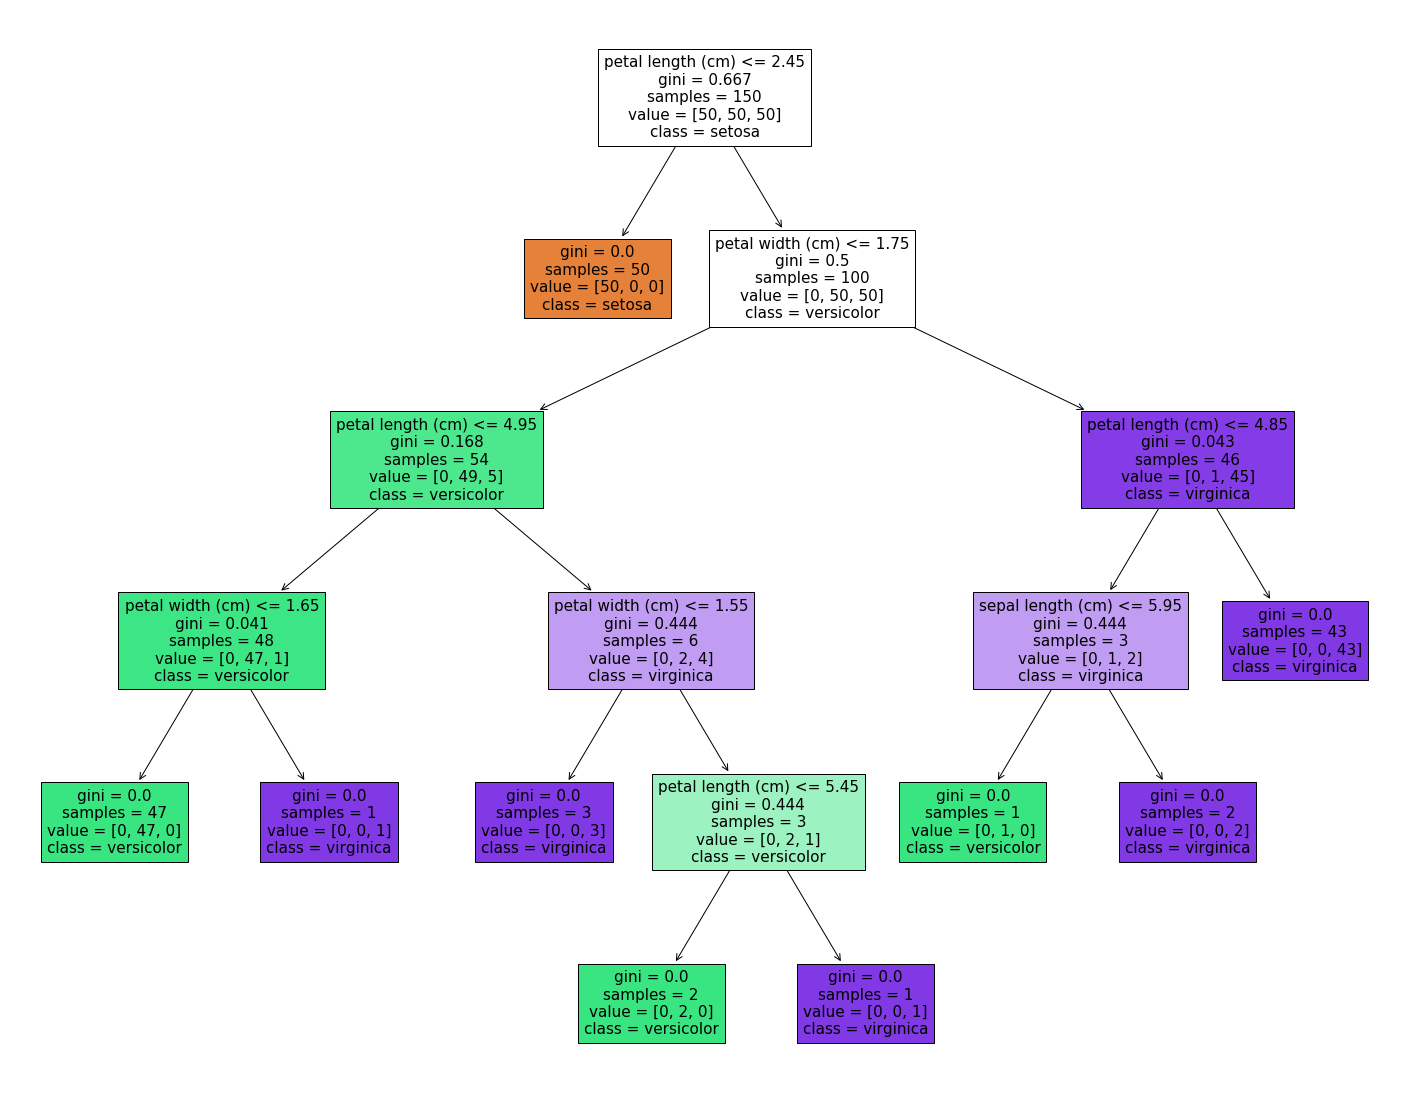

In [18]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=data.feature_names,  
                   class_names=data.target_names,
                   filled=True)

# Decision Tree Knowledge Check
1. Are decision trees deterministic?
1. How are decision trees split determined?
1. Are decision trees parametric? 
1. Decision trees often have high variance, why might that be?

# Decision Tree Knowledge Check Answers
1. Are decision trees deterministic?
    - Yes they are deterministic. The best split will be found at each iterative step and will be used. 
1. How are decision trees split determined?
    - Information gain or entropy reduction
1. Are decision trees parametric? 
    - No, they are not parametric. Splits may differ in direction based on values.
1. Decision trees often have high variance, why might that be?
    - May lock in wrong features or overfit to data

# Random Forest: Expanding on Decision Trees
1. How might decision trees be leveraged to reduce variance?
1. Would multiple deterministic decision trees be useful?
    1. How could they not be deteministic?

# Random Forest: Expanding on Decision Trees
1. How might decision trees be leveraged to reduce variance?
    1. Create multiple classifiers and average the results. Multiple weak learners can ofter produce a strong learner.
1. Would multiple deterministic decision trees be useful?
    1. Only if they were NOT deterministic.
1. How could they not be deteministic?
    1. Bootstrapping data and limiting features at each step

# Random Forest
-An ensemble method that combines many decision trees which have been given different subsets of the data and features to create a strong learner. 

-Reduces variance and creates a non-deterministic model

-Generally use a large number of bushy trees

-Can get excellent performance with minimum tuning
